# Mental Health in the Tech Industry

The dataset can be found at https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry/data . This SQLite database contains 3 tables: Answer, Question, and Survey. Tables contain information about surveys done several years in order to get familiar with the mental health of employees in the tech industry and how situation is handled within companies.

## Goals and Conclusions

My goals are:
* Find out how many people have a mental health disorder and what the most common conditions are.
* Learn if tech industry employers pay enough attention to the mental health of employees.

To achieve goals, I will answer these questions:
* Does the sample represent population properly?
* How many tech industry workers are diagnosed with a mental health disorder?
* Which mental diseases are the most common?
* Does a mental disease interfere with work?
* Do employers provide mental health benefits as a part of healthcare coverage?
* How much importance do employers place on mental health?



Insights:
* In conclusion, some aspects of population (race, country of residence) could be better represented as having the majority of responders from USA creates geographical sampling bias. However, other aspects of population are represented well and I believe the sample could to be used in order to determine the situation in the tech industry.
* 1363 out of 2095, which is equal to approx. 65% respondents, admit to having been diagnosed with a mental health disorder. 
* Anxiety and mood disorders, including depression, are the most prevalent mental health conditions among both the general population and tech industry employees.
* Employers should ensure that people with mental health disorders get proper care, as mental health and productivity are strongly related, and treated disorders less often interfere with the work.
* 48.8% of employees say that their employer provides mental health benefits, and 30.4% of users do not know if they have those benefits. A high proportion of uninformed employees could be a result of majority of employers not communicating regarding mental health.
* On average, employees named importance of mental health for employer score to be approximately 5 out of 10.
* Overall, employers could pay more attention to the mental health of employees. Discussions about mental disorders could be occasionally organised with the intention to introduce health benefits provided by the workplace, encourage people to seek treatment, and show that mental health of workers is important to the company.

## Setup

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Settings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('ggplot')

Loading data for prevalence rates (source: https://www.kaggle.com/datasets/imtkaggleteam/mental-health/data)

In [3]:
prevalence = pd.read_csv('data/mental-illnesses-prevalence.csv')
prevalence.rename(columns={
"Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized"
: 'Schizophrenia disorders',
"Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"
: 'Depressive disorders',
"Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized"
: 'Anxiety disorders',
"Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized"
: 'Bipolar disorders',
"Eating disorders (share of population) - Sex: Both - Age: Age-standardized"
: 'Eating disorders'}, inplace=True)
prevalence = prevalence[prevalence.Entity == 'World']

## Inspection of Sample

This section is dedicated to getting familiar with the sample, finding out the size of it, and if there could be sampling bias.

In [4]:
sampleinfo = pd.read_csv('data/sampleinfo.csv')

print('Total number of respondents:', len(sampleinfo.UserID.unique()))

Total number of respondents: 4218


count    4204.000000
mean       33.851332
std         8.072537
min        15.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        74.000000
Name: age, dtype: float64


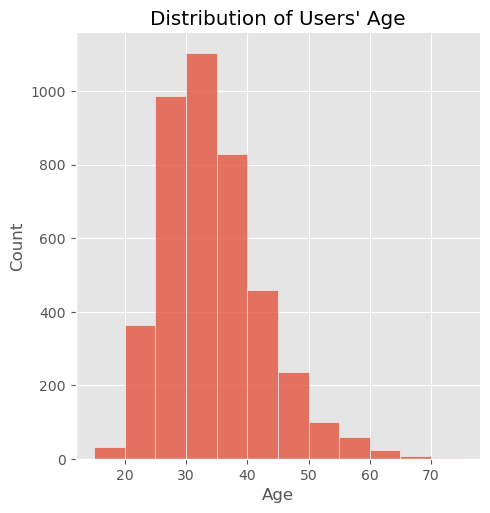

In [5]:
age = pd.read_csv('data/age.csv')

print(age.age.describe())
sns.displot(age, x="age", binwidth=5)
plt.title("Distribution of Users' Age")
plt.xlabel('Age');

The majority of responders are younger than 40 years old (3rd quartile - 38 years), which is consistent with information found in various sources. It is said that ageism is a serious problem in the tech industry and people as young as 35 years old are considered "old" in this field.

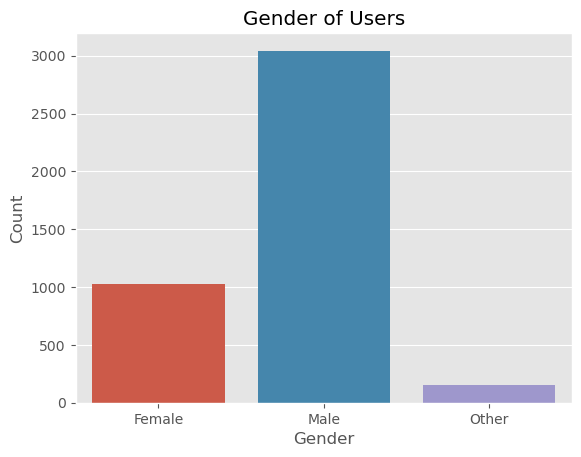

In [6]:
gender = pd.read_csv('data/gender.csv')

sns.barplot(gender, x='gender', y='count')
plt.title("Gender of Users")
plt.xlabel('Gender')
plt.ylabel('Count');

According to different sources, women make up only about one-third of tech workers and sample shows similar statistics.

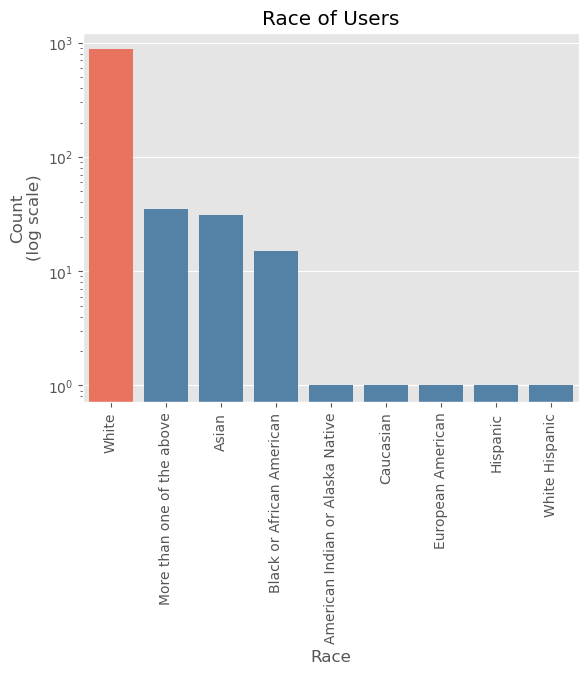

In [7]:
race = pd.read_csv('data/race.csv')

colors = ['steelblue' if (col < max(race['count'])) else 'tomato' for col in
           race['count']]
sns.barplot(race, x='race', y='count', palette=colors)
plt.title('Race of Users')
plt.xlabel('Race')
plt.ylabel('Count\n(log scale)')
plt.xticks(rotation=90)
plt.yscale('log');

While comparing results with other statistics, it can be obtained that white people hold the most positions in industry and Asians are the second most popular race. In this sample, black people are shown to be in a higher position than Hispanics. However, separate studies claim the opposite (source: https://www.zippia.com/advice/diversity-in-high-tech-statistics/). It is also worth mentioning that the proportion of white people in this sample is higher than in the tech industry. Overall, population could be better represented race-wise, but I do not believe that the sample is compromised.

In [8]:
country = pd.read_csv('data/country.csv')

print('Number of countries in total:', len(country.country.unique()))
country.head(20)

Number of countries in total: 80


,country,count
0,United States of America,2604
1,United Kingdom,482
2,Canada,199
3,Germany,136
4,Netherlands,98
5,Australia,73
6,France,51
7,Ireland,51
8,India,50
9,Brazil,37


Out of 195 UN recognised countries, the sample has responders from 80 countries. However, the majority of responders are from the United States of America, which results in sample better explaining situation in US than worldwide. 

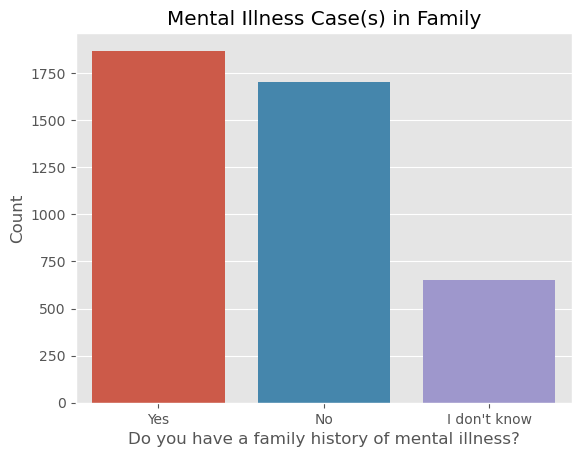

In [9]:
illness_history = pd.read_csv('data/illnesshistory.csv')

sns.barplot(illness_history, x='mental_illness_history', y='count')
plt.title('Mental Illness Case(s) in Family')
plt.xlabel('Do you have a family history of mental illness?')
plt.ylabel('Count');

Since genetics can have a significant part in developing a mental illness (source: https://www.healthline.com/health/are-mental-illness-genetic), it is important that there are responders with and without family history of mental health disorders as it helps to avoid bias.

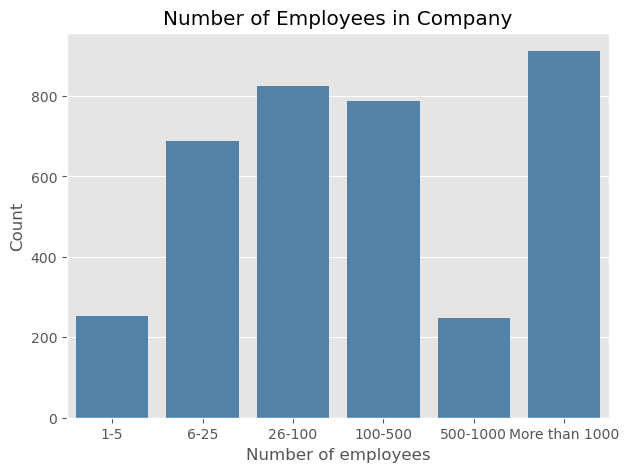

In [10]:
employees = pd.read_csv('data/employees.csv')

plt.figure(figsize=(7, 5))
sns.barplot(employees, x='employeesno', y='count', color='steelblue')
plt.title('Number of Employees in Company')
plt.xlabel('Number of employees')
plt.ylabel('Count');

Users, who answered the surveys, work for various-size companies. It ensures that information comes from big, medium, and small corporations.

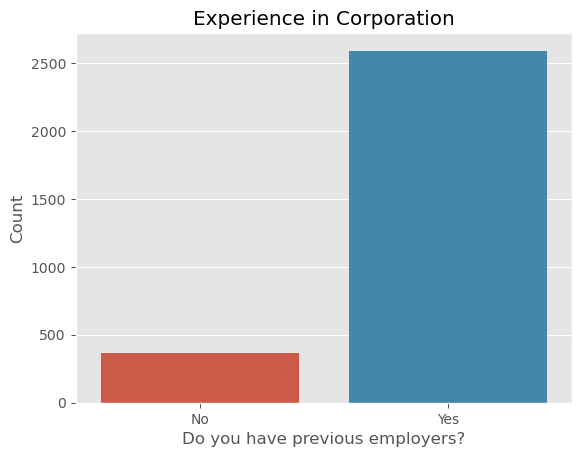

In [11]:
experience = pd.read_csv('data/experience.csv')

sns.barplot(experience, x='experience', y='count')
plt.title('Experience in Corporation')
plt.xlabel('Do you have previous employers?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes']);

Lastly, I checked if a job in the tech industry is not a first job for most respondents thinking that if the answer to the question "Do you have previous employers?" is "yes," they have worked for a company before. As new experiences can cause additional stress, having a lot of new employees could make the situation look worse than it actually is.

### Conclusion
In conclusion, some aspects of population (race, country of residence) could be better represented as having the majority of responders from USA creates geographical sample bias. However, other aspects of population are represented well and I believe the sample could to be used in order to determine the situation in the tech industry.

## Exploratory Data Analysis

### Mental Health of Tech Industry Employees

I am beginning my exploratory data analysis of the dataset by learning how many employees in the tech industry have ever been diagnosed with a mental health disorder.

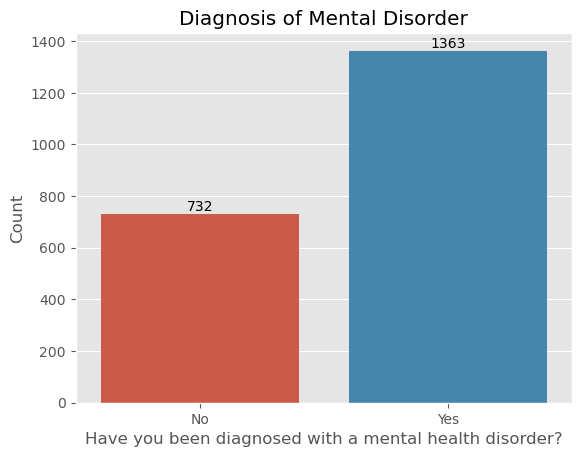

In [12]:
diagnosis = pd.read_csv('data/diagnosis.csv')

ax = sns.barplot(diagnosis, x='diagnosis', y='count')
plt.title('Diagnosis of Mental Disorder')
plt.xlabel('Have you been diagnosed with a mental health disorder?')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
ax.bar_label(ax.containers[0]);

1363 out of 2095 (~65%) respondents to this question admit to having been diagnosed with a mental health disorder. Next step is to find out what the most popular diagnoses are.

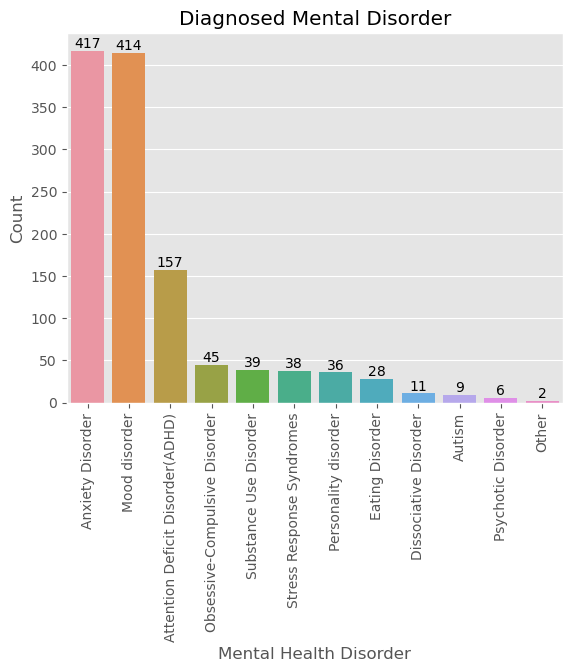

In [13]:
disorders = pd.read_csv('data/disorders.csv')

ax = sns.barplot(disorders, x='disorders', y='count')
plt.title('Diagnosed Mental Disorder')
plt.xlabel('Mental Health Disorder')
plt.ylabel('Count')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0]);

The most common (approx. 35% of all mentioned) are anxiety (incl. generalised, social, intimacy, PTSD, etc.) disorders. Almost as frequent as anxiety are mood (incl. depression, bipolar, seasonal affective, etc.) disorders.  Groups of diseases were altered based on various sources (main source: https://www.betterhealth.vic.gov.au/health/servicesandsupport/types-of-mental-health-issues-and-illnesses). Also, some responses were not included because WHO does not recognise them as disorders (e.g. gender incongruence, source: ICD-11).

Let us compare these findings with information from other dataset. Mental health dataset (source: https://www.kaggle.com/datasets/imtkaggleteam/mental-health/data) provides information about prevalence rates and symptoms of mental disorders from throughout the world, not limited to tech industry workers.

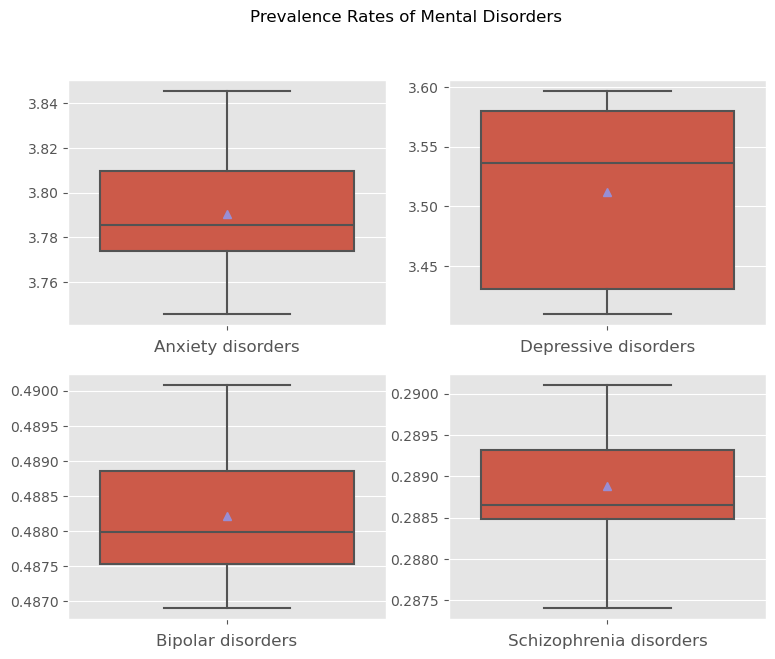

In [14]:
plt.figure(figsize=(9, 7))
plt.subplot(2, 2, 1)
sns.boxplot(prevalence, y='Anxiety disorders', showmeans=True)
plt.xlabel('Anxiety disorders')
plt.ylabel(None)
plt.subplot(2, 2, 2)
sns.boxplot(prevalence, y='Depressive disorders', showmeans=True)
plt.xlabel('Depressive disorders')
plt.ylabel(None)
plt.subplot(2, 2, 3)
sns.boxplot(prevalence, y='Bipolar disorders', showmeans=True)
plt.xlabel('Bipolar disorders')
plt.ylabel(None)
plt.subplot(2, 2, 4)
sns.boxplot(prevalence, y='Schizophrenia disorders', showmeans=True)
plt.xlabel('Schizophrenia disorders')
plt.ylabel(None)
plt.suptitle('Prevalence Rates of Mental Disorders');

Consistently with previous results, anxiety and depressive (mood) disorders are the most common. Prevalence rate for anxiety disorders varies between ~3.745 and ~3.845. For depressive disorders, between ~3.41 and ~3.6.
Bipolar disorders are considered to be part of the mood disorders group in the main dataset. Here we can see individual prevalence rates for this illness are between 0.4869 and 0.4901, with median of 0.4880. Scizophrenia falls under psychotic disorder in the main dataset; it is the least common of visualised diseases, prevalence rate is between 0.2874 and 0.2901, with median of approx. 0.2886.  
My next step is to see how prevalance rate of these disorders has changed over time.

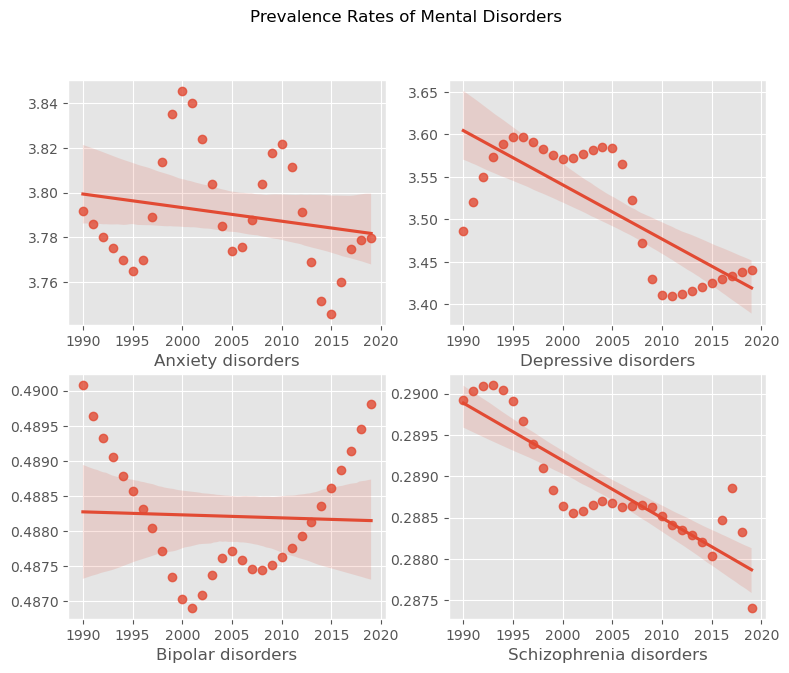

In [15]:
plt.figure(figsize=(9, 7))
plt.subplot(2, 2, 1)
sns.regplot(prevalence, x='Year', y='Anxiety disorders')
plt.xlabel('Anxiety disorders')
plt.ylabel(None)
plt.subplot(2, 2, 2)
sns.regplot(prevalence, x='Year', y='Depressive disorders')
plt.xlabel('Depressive disorders')
plt.ylabel(None)
plt.subplot(2, 2, 3)
sns.regplot(prevalence, x='Year', y='Bipolar disorders')
plt.xlabel('Bipolar disorders')
plt.ylabel(None)
plt.subplot(2, 2, 4)
sns.regplot(prevalence, x='Year', y='Schizophrenia disorders')
plt.xlabel('Schizophrenia disorders')
plt.ylabel(None)
plt.suptitle('Prevalence Rates of Mental Disorders');

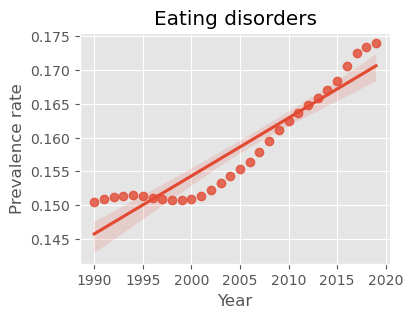

In [16]:
plt.figure(figsize=(4, 3))
sns.regplot(prevalence, x='Year', y='Eating disorders')
plt.ylabel('Prevalence rate')
plt.title('Eating disorders');

In [17]:
prevalence[['Year', 'Schizophrenia disorders', 'Depressive disorders',
'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']].corr()

,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
Year,1.000000,-0.876873,-0.759502,-0.206288,-0.042677,0.938186
Schizophrenia disorders,-0.876873,1.000000,0.554361,-0.100408,0.328146,-0.703577
Depressive disorders,-0.759502,0.554361,1.000000,0.200261,-0.271140,-0.853774
Anxiety disorders,-0.206288,-0.100408,0.200261,1.000000,-0.602461,-0.379971
Bipolar disorders,-0.042677,0.328146,-0.271140,-0.602461,1.000000,0.290104
Eating disorders,0.938186,-0.703577,-0.853774,-0.379971,0.290104,1.000000


Although prevalence rates are inconsistent, the regression line shows that the overall commonness of schizophrenia, depressive, anxiety, and bipolar diseases is decreasing. On the other hand, negative correlation between bipolar disorders and time is extremely weak. It would be interesting to see prevalence rates over the past 4 years; there is a possibility that correlation became positive as rates were increasing since 2008. Also, due to uncertainty, anxiety disorders and bipolar disorders could appear to be uncorrelated  or correlated positively with time. Regression lines of those disorders could change within confidence interval and the slope would become positive or equal to zero. However, prevalence of eating disorders is undoubtedly increasing and is very strongly correlated with time.


### Attitude of Employers Towards Mental Health

It is clear that many people in the tech industry have issues with mental health. Next question is what employers do to help. First, I would like to find out whether people mention their mental condition during a job interview.

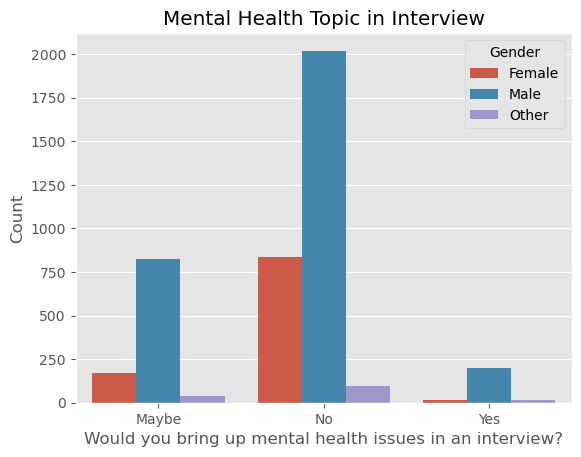

In [18]:
interview = pd.read_csv('data/interviewag.csv')

sns.barplot(interview, x='interview', y='count', hue='gender')
plt.title('Mental Health Topic in Interview')
plt.xlabel('Would you bring up mental health issues in an interview?')
plt.ylabel('Count')
plt.legend(title='Gender');

Even though more than half users admit to be diagnosed with a mental condition, very few would mention it in a job interview.

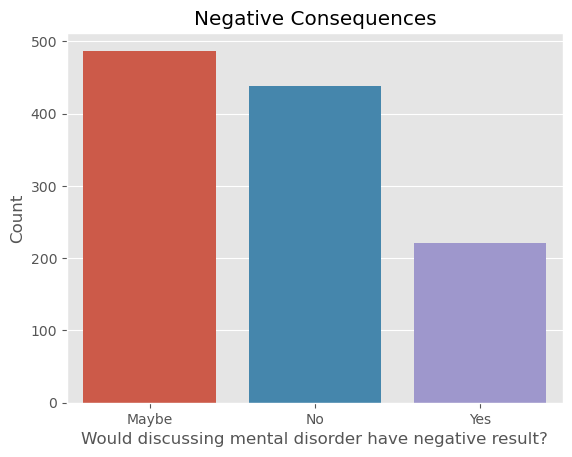

In [19]:
negativity = pd.read_csv('data/negativity.csv')

sns.barplot(negativity, x='negativity', y='count')
plt.title('Negative Consequences')
plt.xlabel('Would discussing mental disorder have negative result?')
plt.ylabel('Count');

One of the possibilities why (potential) employees do not discuss mental disorders could be a fear of negative reactions and consequences from the employer. Most people do not have a clear opinion on whether such talk would negatively impact the employee. However, more respondents think that the discussion would not lead to bad outcomes than that it would. Despite that, it is possible that employers often do not know how many people in their company have problems regarding mental health due to employees not being willing to mention it. I would like to see if mental conditions tend to interfere with work.

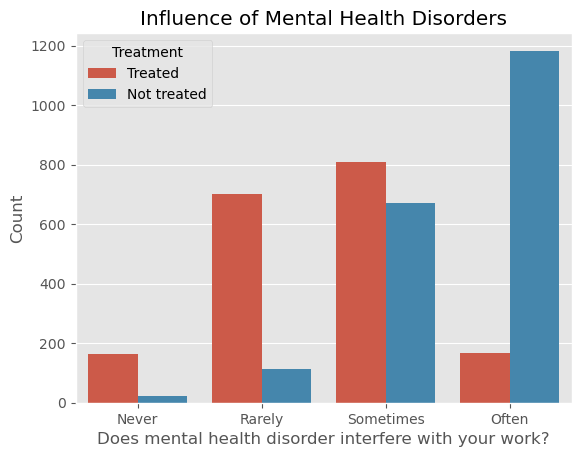

In [20]:
interference = pd.read_csv('data/interference.csv')

sns.barplot(interference, x='interference', y='count', hue='treatment')
plt.title('Influence of Mental Health Disorders')
plt.xlabel('Does mental health disorder interfere with your work?')
plt.ylabel('Count')
plt.legend(title='Treatment');

This grouped bar plot shows that mental disorders less often interfere with the work of people who get their respective treatments. It supports the idea that mental health and effectiveness are linked and shows that treated mental disorders are not disadvantageous in a workplace. My suggestion for employers would be to ensure that people with mental health disorders get proper care, as mental health and productivity are strongly related (source: https://www.psychologytoday.com/intl/basics/productivity/mental-health-and-productivity). Next plots are dedicated to learning more about employers actions. 

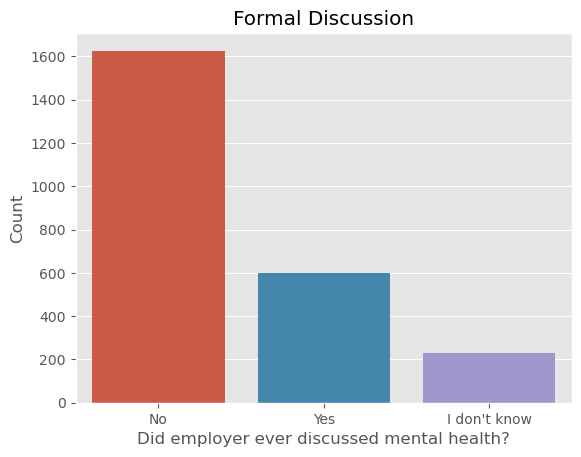

In [21]:
campaign = pd.read_csv('data/campaign.csv')

sns.barplot(campaign, x='campaign', y='count')
plt.title('Formal Discussion')
plt.xlabel('Did employer ever discussed mental health?')
plt.ylabel('Count');

It appears that majority (~66%) of employers never formally discussed mental health with employees during healthcare campaigns of similar meetings.

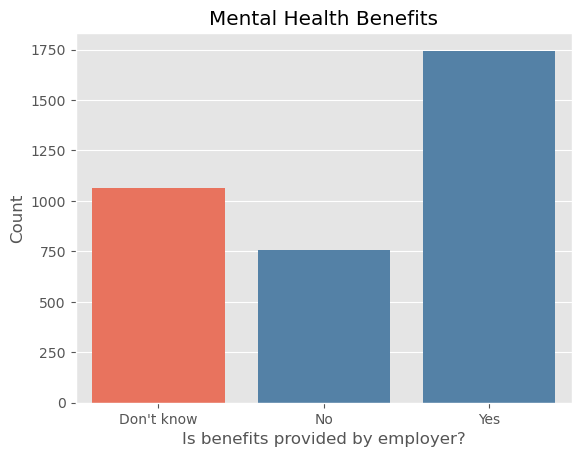

In [22]:
benefits = pd.read_csv('data/benefits.csv')

colors = ['steelblue' if (col != "Don't know") else 'tomato' for col in 
          benefits.benefits]
sns.barplot(benefits, x='benefits', y='count', palette=colors)
plt.title('Mental Health Benefits')
plt.xlabel('Is benefits provided by employer?')
plt.ylabel('Count');

Most employers provide mental health benefits as a part of a healthcare coverage. What surprises me here is that 30.4% of users did not know if they have those benefits. I would like to see how many responders know the options for mental health care their employer provides.

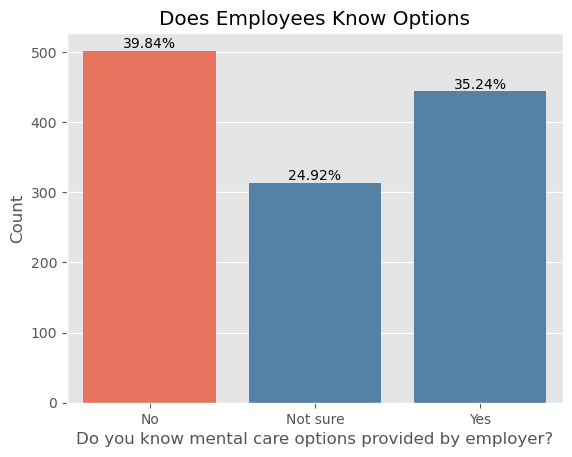

In [23]:
knows = pd.read_csv('data/knows.csv')

colors = ['steelblue' if (col != "No") else 'tomato' for col in knows.knows]
ax = sns.barplot(knows, x='knows', y='count', palette=colors)
plt.title('Does Employees Know Options')
plt.xlabel('Do you know mental care options provided by employer?')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], labels=knows.percent);

The majority (~65%) of responders do not know or are not sure about what mental care is provided by the employer. I believe that poor official communication about mental health disorders within companies results in employees not knowing what healthcare benefits they can use and not discussing their problems because it might feel unwelcome. Lastly, I will analyse how overall important mental health is for employers (grade employees).

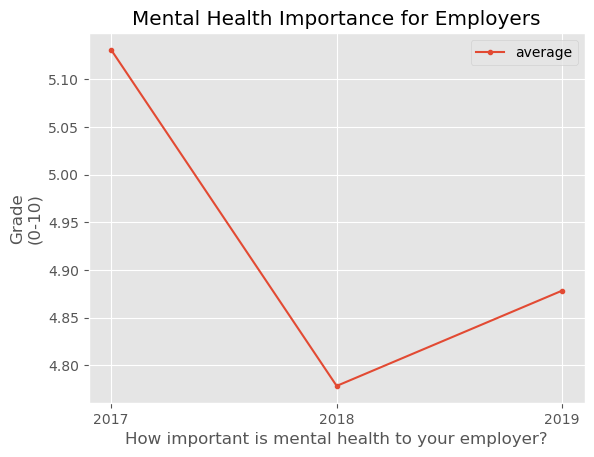

In [24]:
average = pd.read_csv('data/averagepoint.csv')

average.plot(x='year', y='average', style='.-')
plt.title('Mental Health Importance for Employers')
plt.xlabel('How important is mental health to your employer?')
plt.ylabel('Grade\n(0-10)')
plt.xticks(np.arange(2017, 2020, 1));

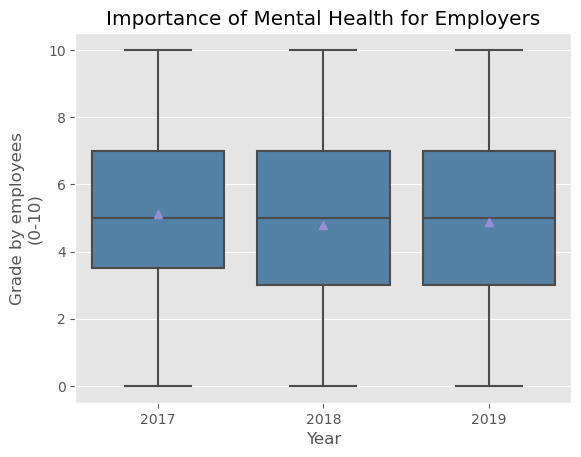

In [25]:
allgrades = pd.read_csv('data/distributionpoint.csv')

sns.boxplot(allgrades, x='year', y='grade', color='steelblue', showmeans=True)
plt.title('Importance of Mental Health for Employers')
plt.xlabel('Year')
plt.ylabel('Grade by employees\n(0-10)');

It appears that the attitude of employers had not changed much over 3 years. On average, employees named importance of mental health for employer score to be approximately 5 out of 10, slightly varying depending on the year. A median score is 5 for all years.

Overall, employers could pay more attention to the mental health of employees. Discussions about mental disorders could be occasionally organised with the intention to introduce health benefits provided by the workplace, encourage people to seek treatment, and show that mental health of workers is important to the company.

## Conclusions

* I did not find strong evidence of sampling bias. Some aspects of population (race, country of residence) could be better represented. However, I believe the sample is big and diverse enough to properly represent the population.
* 1363 out of 2095, which is equal to approx. 65% respondents, admit to having been diagnosed with a mental health disorder. 
* Anxiety and mood disorders, including depression, are the most prevalent mental health conditions among both the general population and tech industry employees.
* Employers should ensure that people with mental health disorders get proper care, as mental health and productivity are strongly related, and treated disorders less often interfere with the work.
* 48.8% of employees say that their employer provides mental health benefits, and 30.4% of users do not know if they have those benefits. A high proportion of uninformed employees could be a result of majority of employers not communicating regarding mental health.
* On average, employees named importance of mental health for employer score to be approximately 5 out of 10.
* Overall, employers could pay more attention to the mental health of employees. Discussions about mental disorders could be occasionally organised with the intention to introduce health benefits provided by the workplace, encourage people to seek treatment, and show that mental health of workers is important to the company.

## Next Steps and Improvements

In order to continue the analysis, prevalence rates of mental disorders could be compared between developed, developing, and least developed countries. Another suggestion would be to set one more goal and analyse how people with mental disorders feel at work, what their experiences are of being identified as a person with a mental health issues, and how colleagues communicate with them.